In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from itertools import cycle

In [2]:
def transform_data(data: pd.DataFrame) -> pd.DataFrame:
    data.drop(columns=['Index', 'SMU-1 Time (s)', 'Resistance (Ohm)'], inplace=True)
    data.rename(columns={'SMU-1 Voltage (V)':'Voltage', 'SMU-1 Current (A)':'Current'}, inplace=True)
    data.Current = data.Current * 10**6
    
    return data

In [3]:
dfs_uv = []

for file_path in glob.iglob('/kaggle/input/uv-fwd-rev-2023/uv/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_uv.append(data)

In [4]:
colors = ['r', 'b', 'g', 'c', 'm', 'k']
linestyles = ['-', '--', '-.', ':']

color_cycle = cycle(colors)
linestyle_cycle = cycle(linestyles)

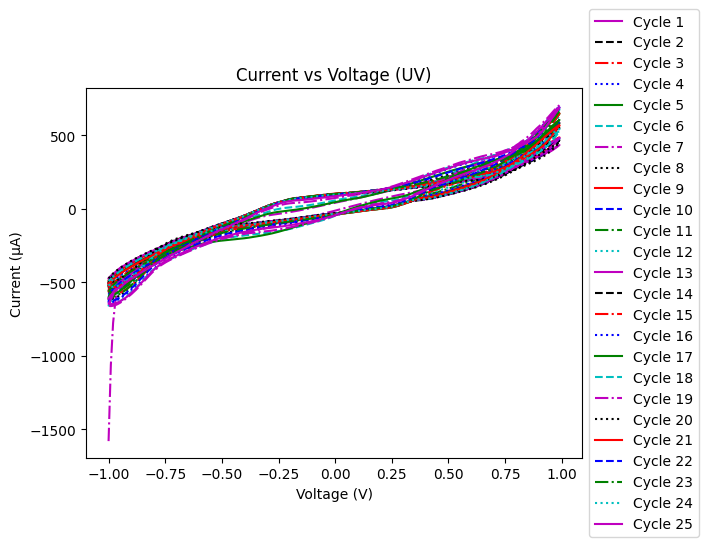

In [9]:
for i in range(len(dfs_uv)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    plt.plot(dfs_uv[i].Voltage, dfs_uv[i].Current, linestyle=linestyle, color=color, linewidth=1.5, label=f'Cycle {i+1}')
    
    
plt.title("Current vs Voltage (UV)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (μA)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()